In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from adjustText import adjust_text
from highlight_text import fig_text
import matplotlib.patheffects as pe
import matplotlib.pyplot as plt
from mplsoccer import VerticalPitch, Pitch
from mplsoccer.utils import FontManager

import requests
from bs4 import BeautifulSoup
import json
import pandas as pd

import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
import cmasher as cmr

In [2]:
base_url = 'https://understat.com/player/5543'
url = base_url

In [3]:
#Use requests to get the webpage and BeautifulSoup to parse the page
res = requests.get(url)
soup = BeautifulSoup(res.content, 'lxml')
scripts = soup.find_all('script')

#get only the shotsData
strings = scripts[3].string
strings

"\n\tvar shotsData \t= JSON.parse('\\x5B\\x7B\\x22id\\x22\\x3A\\x22118505\\x22,\\x22minute\\x22\\x3A\\x2282\\x22,\\x22result\\x22\\x3A\\x22MissedShots\\x22,\\x22X\\x22\\x3A\\x220.9169999694824219\\x22,\\x22Y\\x22\\x3A\\x220.5579999923706055\\x22,\\x22xG\\x22\\x3A\\x220.09240715950727463\\x22,\\x22player\\x22\\x3A\\x22Gabriel\\x20Jesus\\x22,\\x22h_a\\x22\\x3A\\x22h\\x22,\\x22player_id\\x22\\x3A\\x225543\\x22,\\x22situation\\x22\\x3A\\x22OpenPlay\\x22,\\x22season\\x22\\x3A\\x222016\\x22,\\x22shotType\\x22\\x3A\\x22Head\\x22,\\x22match_id\\x22\\x3A\\x223356\\x22,\\x22h_team\\x22\\x3A\\x22Manchester\\x20City\\x22,\\x22a_team\\x22\\x3A\\x22Tottenham\\x22,\\x22h_goals\\x22\\x3A\\x222\\x22,\\x22a_goals\\x22\\x3A\\x222\\x22,\\x22date\\x22\\x3A\\x222017\\x2D01\\x2D21\\x2020\\x3A30\\x3A00\\x22,\\x22player_assisted\\x22\\x3A\\x22Kevin\\x20De\\x20Bruyne\\x22,\\x22lastAction\\x22\\x3A\\x22Cross\\x22\\x7D,\\x7B\\x22id\\x22\\x3A\\x22118507\\x22,\\x22minute\\x22\\x3A\\x2284\\x22,\\x22result\\x22\\x3A\

In [4]:
# strip unnecessary symbols and get only JSON data 
ind_start = strings.index("('")+2 
ind_end = strings.index("')") 
json_data = strings[ind_start:ind_end] 
json_data = json_data.encode('utf8').decode('unicode_escape')

#convert string to json format
data = json.loads(json_data)
data

[{'id': '118505',
  'minute': '82',
  'result': 'MissedShots',
  'X': '0.9169999694824219',
  'Y': '0.5579999923706055',
  'xG': '0.09240715950727463',
  'player': 'Gabriel Jesus',
  'h_a': 'h',
  'player_id': '5543',
  'situation': 'OpenPlay',
  'season': '2016',
  'shotType': 'Head',
  'match_id': '3356',
  'h_team': 'Manchester City',
  'a_team': 'Tottenham',
  'h_goals': '2',
  'a_goals': '2',
  'date': '2017-01-21 20:30:00',
  'player_assisted': 'Kevin De Bruyne',
  'lastAction': 'Cross'},
 {'id': '118507',
  'minute': '84',
  'result': 'MissedShots',
  'X': '0.9330000305175781',
  'Y': '0.6509999847412109',
  'xG': '0.015871815383434296',
  'player': 'Gabriel Jesus',
  'h_a': 'h',
  'player_id': '5543',
  'situation': 'SetPiece',
  'season': '2016',
  'shotType': 'Head',
  'match_id': '3356',
  'h_team': 'Manchester City',
  'a_team': 'Tottenham',
  'h_goals': '2',
  'a_goals': '2',
  'date': '2017-01-21 20:30:00',
  'player_assisted': 'Aleksandar Kolarov',
  'lastAction': 'Cross

In [5]:
len(data)

342

In [6]:
x = []
y = []
xG = []
situation = []
shotType = []
assist = []
result = []

for index in range(len(data)):
    for key in data[index]:
        if key == 'X':
            x.append(data[index][key])
        if key == 'Y':
            y.append(data[index][key])
        if key == 'result':
            result.append(data[index][key])
        if key == 'xG':
            xG.append(data[index][key])
        if key == 'situation':
            situation.append(data[index][key])
        if key == 'shotType':
            shotType.append(data[index][key])
        if key == 'player_assisted':
            assist.append(data[index][key])

In [7]:
col_names = ['x','y','xG','result','situation', 'shotType', 'assist']
df = pd.DataFrame([x,y,xG,result,situation, shotType, assist],index=col_names)
df = df.T
df.head(10)

,x,y,xG,result,situation,shotType,assist
0,0.9169999694824219,0.5579999923706055,0.09240715950727463,MissedShots,OpenPlay,Head,Kevin De Bruyne
1,0.9330000305175781,0.6509999847412109,0.015871815383434296,MissedShots,SetPiece,Head,Aleksandar Kolarov
2,0.9390000152587891,0.5770000076293945,0.5138607025146484,Goal,OpenPlay,LeftFoot,Raheem Sterling
3,0.8859999847412109,0.5629999923706055,0.11831392347812653,MissedShots,OpenPlay,RightFoot,Leroy Sané
4,0.909000015258789,0.5670000076293945,0.10252048075199127,MissedShots,OpenPlay,LeftFoot,Leroy Sané
5,0.9619999694824218,0.555,0.6197951436042786,Goal,OpenPlay,RightFoot,None
6,0.9280000305175782,0.4909999847412109,0.40545159578323364,SavedShot,OpenPlay,Head,David Silva
7,0.99,0.48,0.9722795486450195,Goal,OpenPlay,RightFoot,None
8,0.985999984741211,0.5359999847412109,0.957098662853241,MissedShots,OpenPlay,RightFoot,Sergio Agüero
9,0.92,0.5670000076293945,0.27908316254615784,MissedShots,OpenPlay,Head,Nicolás Otamendi


In [8]:
df['x'] = pd.to_numeric(df['x'])
df['y'] = pd.to_numeric(df['y'])
df['xG'] = pd.to_numeric(df['xG'])

df['x'] = df['x']*100
df['y'] = df['y']*100


df['xx'] = df['y']
df['yy'] = df['x']

df['x'] = df['xx']
df['y'] = df['yy']

df['x'] = df['x']*.8
df['y'] = df['y']*1.2

df.head(10)

,x,y,xG,result,situation,shotType,assist,xx,yy
0,44.639999,110.039996,0.092407,MissedShots,OpenPlay,Head,Kevin De Bruyne,55.799999,91.699997
1,52.079999,111.960004,0.015872,MissedShots,SetPiece,Head,Aleksandar Kolarov,65.099998,93.300003
2,46.160001,112.680002,0.513861,Goal,OpenPlay,LeftFoot,Raheem Sterling,57.700001,93.900002
3,45.039999,106.319998,0.118314,MissedShots,OpenPlay,RightFoot,Leroy Sané,56.299999,88.599998
4,45.360001,109.080002,0.102520,MissedShots,OpenPlay,LeftFoot,Leroy Sané,56.700001,90.900002
5,44.400000,115.439996,0.619795,Goal,OpenPlay,RightFoot,None,55.500000,96.199997
6,39.279999,111.360004,0.405452,SavedShot,OpenPlay,Head,David Silva,49.099998,92.800003
7,38.400000,118.800000,0.972280,Goal,OpenPlay,RightFoot,None,48.000000,99.000000
8,42.879999,118.319998,0.957099,MissedShots,OpenPlay,RightFoot,Sergio Agüero,53.599998,98.599998
9,45.360001,110.400000,0.279083,MissedShots,OpenPlay,Head,Nicolás Otamendi,56.700001,92.000000


In [9]:
def plotShotMap():
    for x in range(len(df['x'])):
            if df['result'][x] == 'Goal': 
                plt.scatter(df['x'][x],df['y'][x], color = '#74c69d',s=df['xG'][x]*500,edgecolor='white',linewidth=2,alpha=.9)       
            else:
                plt.scatter(df['x'][x],df['y'][x], color = '#ff4d4d',s=df['xG'][x]*500,edgecolor='white',alpha=.9)

       

Text(0.8, 0.33, '@joel_mcfc98')

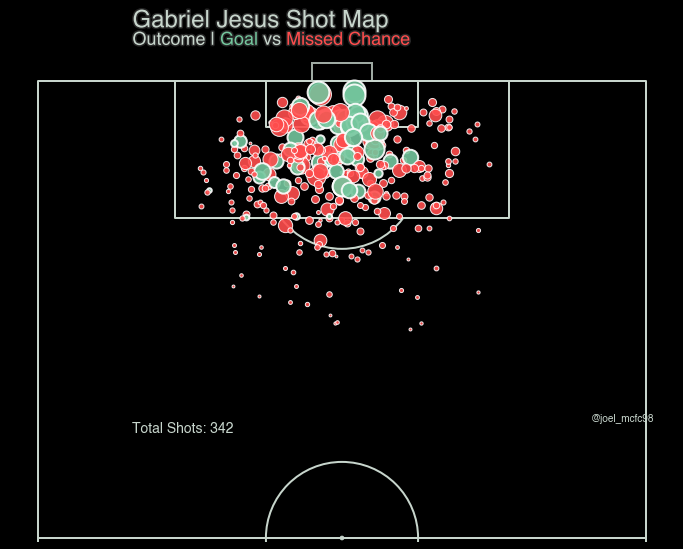

In [10]:
fig, ax = plt.subplots(figsize=(12,10))
fig.set_facecolor('#000000')
ax.patch.set_facecolor('#000000')
plt.rcParams['font.family'] = 'Helvetica'

#The statsbomb pitch from mplsoccer
pitch = VerticalPitch(pitch_type='statsbomb', pad_bottom=0.5,
              pitch_color='#000000', line_color='#c7d5cc', figsize=(16, 8),
              constrained_layout=False, tight_layout=True, half=True,
              goal_type='box', goal_alpha=0.8)

pitch.draw(ax=ax)
#I invert the axis to make it so I am viewing it how I want
plt.gca().invert_xaxis()
plotShotMap()


s='Gabriel Jesus Shot Map'
fig_text(s=s,
        x=.27,y=.9,
        fontsize=24,
        color='#c7d5cc',
        path_effects=[pe.Stroke(linewidth=3, foreground='0.15'),
                       pe.Normal()])

fig_text(x=.27,y=.87, ha='left', color='#c7d5cc',
             fontsize=18, fontweight='bold',
             s='Outcome | <Goal> vs <Missed Chance>',
             path_effects=[pe.Stroke(linewidth=3, foreground='0.15'),
                       pe.Normal()],
             highlight_textprops=[{"color": '#74c69d'},
                                  {"color": '#ff4d4d'}])

total_shots = len(df)

fig_text(s=f'Total Shots: {total_shots}',
        x=.27, y =.33, fontsize=14,color='#c7d5cc')

fig.text(.8,.33,f'@joel_mcfc98', fontstyle='italic',fontsize=10,color='#c7d5cc')

#plt.savefig('bcnjuveshots.png',dpi=300,bbox_inches = 'tight',facecolor='#22312b')

In [194]:
df2 = df.copy()
df2['G-xG'] = np.where(df2['result']=='Goal', 1-df2['xG'], 0-df2['xG'])

In [195]:
df2.head(10)

,x,y,xG,result,situation,shotType,assist,xx,yy,G-xG
0,44.639999,110.039996,0.092407,MissedShots,OpenPlay,Head,Kevin De Bruyne,55.799999,91.699997,-0.092407
1,52.079999,111.960004,0.015872,MissedShots,SetPiece,Head,Aleksandar Kolarov,65.099998,93.300003,-0.015872
2,46.160001,112.680002,0.513861,Goal,OpenPlay,LeftFoot,Raheem Sterling,57.700001,93.900002,0.486139
3,45.039999,106.319998,0.118314,MissedShots,OpenPlay,RightFoot,Leroy Sané,56.299999,88.599998,-0.118314
4,45.360001,109.080002,0.102520,MissedShots,OpenPlay,LeftFoot,Leroy Sané,56.700001,90.900002,-0.102520
5,44.400000,115.439996,0.619795,Goal,OpenPlay,RightFoot,None,55.500000,96.199997,0.380205
6,38.400000,118.800000,0.972280,Goal,OpenPlay,RightFoot,None,48.000000,99.000000,0.027720
7,39.279999,111.360004,0.405452,SavedShot,OpenPlay,Head,David Silva,49.099998,92.800003,-0.405452
8,42.879999,118.319998,0.957099,MissedShots,OpenPlay,RightFoot,Sergio Agüero,53.599998,98.599998,-0.957099
9,45.360001,110.400000,0.279083,MissedShots,OpenPlay,Head,Nicolás Otamendi,56.700001,92.000000,-0.279083


In [206]:
df2['G-xG'].sum()

-19.041385595686734

In [204]:
len(df.loc[df['result']=='Goal']) - df['xG'].sum()

-19.041385595686734

In [215]:
def plotHeatMap():
    for x in range(len(df['x'])):
            if df['result'][x] == 'Goal': 
               kdeplot = pitch.kdeplot(df2['x'], df2['y'], ax=ax, cmap=pearl_earring_cmap_100, shade=True, levels=100)

In [216]:
pearl_earring_cmap_100 = LinearSegmentedColormap.from_list("Pearl Earring - 100 colors",
                                                           ['#15242e', '#4393c4'], N=100)

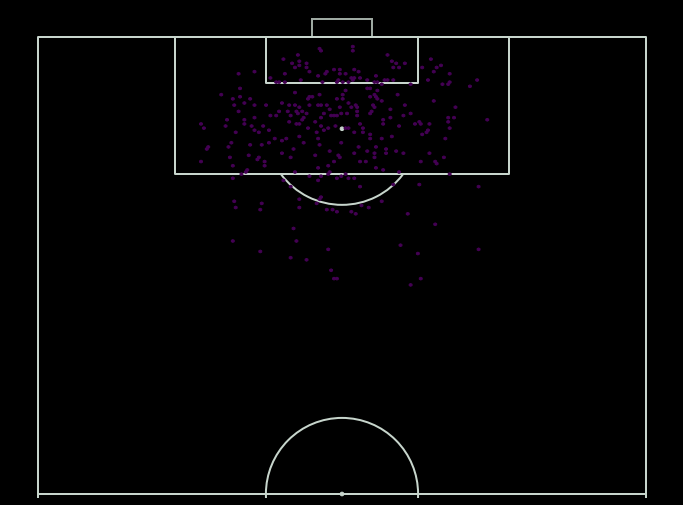

In [219]:
fig, ax = plt.subplots(figsize=(12,10))
fig.set_facecolor('#000000')
ax.patch.set_facecolor('#000000')
plt.rcParams['font.family'] = 'Helvetica'

#The statsbomb pitch from mplsoccer
pitch = VerticalPitch(pitch_type='statsbomb', pad_bottom=0.5,
              pitch_color='#000000', line_color='#c7d5cc', figsize=(16, 8),
              constrained_layout=False, tight_layout=True, half=True,
              goal_type='box', goal_alpha=0.8)

pitch.draw(ax=ax)
#I invert the axis to make it so I am viewing it how I want
plt.gca().invert_xaxis()
plt.hexbin(df['x'], df['y'], C=df['G-xG'])
